# 02한국 복지패널 데이터 셋
>[https://www.koweps.re.kr:442](https://www.koweps.re.kr:442)


## 예제에서 사용될 변수들의 의미(사진첨부 방법은 클릭!)
![데이터표](dataset2017_fieldname.jpg)


In [1]:
import numpy
import datetime as dt
import pandas as pd
from pandas import DataFrame
from pandas import ExcelFile
from matplotlib import pyplot

In [2]:
#엑셀 파일을 원격으로 내려받아 데이터프레임으로 변환(다소 시간이 소요된다. )
xlsx = ExcelFile("dataset2017.xlsx")
df = xlsx.parse(xlsx.sheet_names[0])
df

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


### 01.조사대상들에 대한 성별 분포

####1) 데이터 전처리

##### 성별컬럼만 추출

In [3]:
성별추출 = df.filter(['h12_g3'])
성별추출

,h12_g3
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


##### 성별 변수의 이름을 인식하기 쉬운 값으로 변경하기

In [4]:
성별추출_df = 성별추출.rename(columns={'h12_g3' : '성별'})
성별추출_df

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [5]:
##### 성별값을 남자, 여자로 변환

In [6]:
성별추출_df['성별'] = numpy.where(성별추출_df['성별']==1, '남자','여자')
성별추출_df

,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


## 2) 데이터 정제
### 결측치확인
####결측치가 없다는 것이 확인된다

In [7]:
성별추출_df.isna().sum()

성별    0
dtype: int64

## 3)데이터 분석

### 성별의 데이터 분포 확인

In [8]:
성별분포 = 성별추출_df['성별'].value_counts()
성별분포

여자    8440
남자    6982
Name: 성별, dtype: int64

#### 변환된 값에 의한 서별 데이터 분포를 데이터 프레임으로 만들기

In [9]:
성별분포_df =DataFrame(성별분포)
성별분포_df

,성별
여자,8440
남자,6982


컬럼이름을 성별에서 명으로 변경

In [10]:
성별분포_분석결과_df= 성별분포_df.rename(columns={'성별' : '명'})
성별분포_분석결과_df

,명
여자,8440
남자,6982


비율순으로 정렬

In [11]:
성별분포_분석결과_df.sort_values('명', inplace=True)
성별분포_분석결과_df

,명
남자,6982
여자,8440


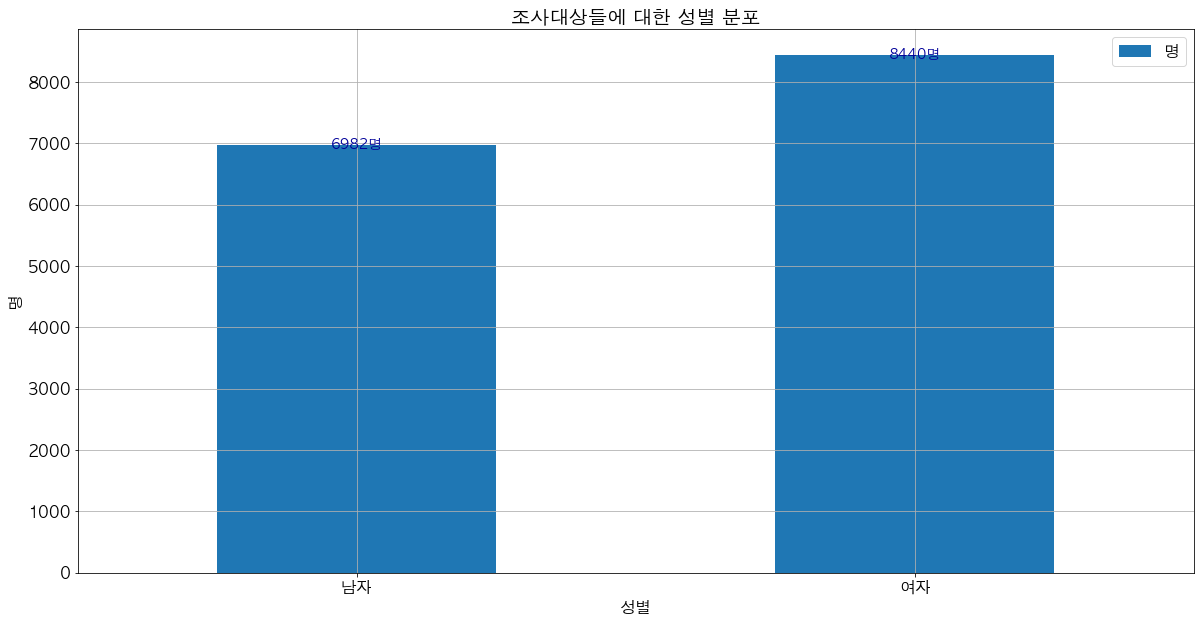

In [12]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,10)

성별분포_분석결과_df.plot.bar(rot=0)
pyplot.title('조사대상들에 대한 성별 분포')
pyplot.grid()
pyplot.xlabel('성별')
pyplot.ylabel('명')

for i, v in enumerate(list(성별분포_분석결과_df['명'])):
    txt = "%d명" %v
    pyplot.text(i, v, txt, fontsize=14, color='#000099',
               horizontalalignment='center', verticalalignment='center')
    

pyplot.show()

## 02. 성별에 따른 평균 월급 차이 분석
### 1) 데이터 전처리
#### 성별과 월급 데이터 만 추출

In [13]:
성별월급추출 = df.filter(['h12_g3','p1202_8aq1'])
성별월급추출

,h12_g3,p1202_8aq1
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [14]:
####성별과 월급 변수의 이름을 인식하기 쉬운값으로 변경하기

In [15]:
성별월급추출_df = 성별월급추출.rename(columns={'h12_g3': '성별', 'p1202_8aq1' : '월급' })
성별월급추출_df

,성별,월급
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [16]:
#####성별값을 남자, 여자로 변환

In [17]:
성별월급추출_df['성별'] = numpy.where(성별월급추출_df['성별']==1, '남자','여자')
성별월급추출_df

,성별,월급
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


## 2) 데이터 정제

### 결측치 확인


In [18]:
성별월급추출_df.isna().sum()

성별        0
월급    10915
dtype: int64

### 결측치 소거

In [19]:
성별월급추출_df.dropna(inplace=True)
성별월급추출_df

,성별,월급
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


#### 이상치결측 처리
1~9998 범위를 벗어나는 값들에 대해 결측치 처리

In [20]:
성별월급추출_df['월급'] = numpy.where(
    ((성별월급추출_df['월급'] < 1 )| (성별월급추출_df['월급'] > 9998)),
     numpy.nan,
     성별월급추출_df['월급'])
성별월급추출_df


,성별,월급
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


In [21]:
성별월급추출_df.isna().sum()

성별     0
월급    14
dtype: int64

In [22]:
성별월급추출_df.dropna(inplace=True)
성별월급추출_df.isna().sum()

성별    0
월급    0
dtype: int64

In [23]:
성별_월급_평균_df = 성별월급추출_df.groupby('성별').mean()
성별_월급_평균_df

,월급
성별,
남자,333.422185
여자,176.359967


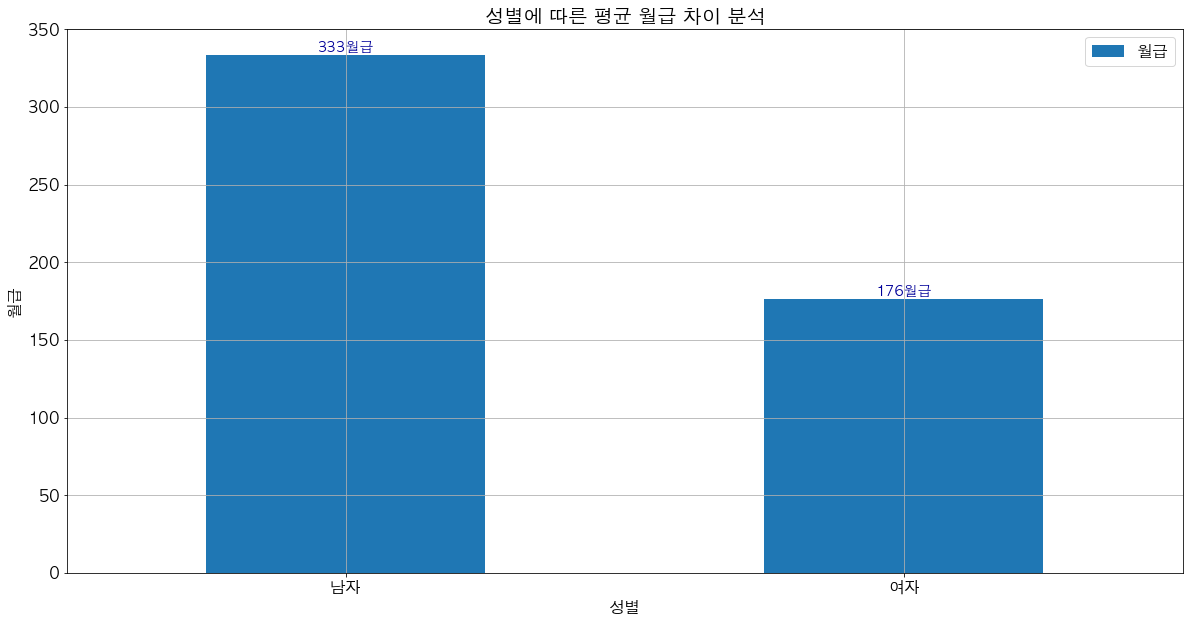

In [24]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,10)

성별_월급_평균_df.plot.bar(rot=0)
pyplot.title('성별에 따른 평균 월급 차이 분석')
pyplot.grid()
pyplot.xlabel('성별')
pyplot.ylabel('월급')

for i, v in enumerate(list(성별_월급_평균_df['월급'])):
    txt = "%d월급" %v
    pyplot.text(i, v, txt, fontsize=14, color='#000099',
               horizontalalignment='center', verticalalignment='bottom')
    

pyplot.show()

In [25]:
## #03. 나이에 따른 평균 월급의 변화

### 1) 데이터 전처리

#### 태어난 년도, 월급에 대한 컬럼 추출

In [26]:
년도월급추출 =df.filter(['h12_g4','p1202_8aq1'])
년도월급추출

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [27]:
#### 태어난 년도와월급 변수의 이름을 인색하기 쉬운값으로 변경하기

In [28]:
년도월급추출_df = 년도월급추출.rename(columns={'h12_g4' : '태어난년도', 'p1202_8aq1':'월급'})
년도월급추출_df

,태어난년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [29]:
####나이를 계산하여 파생변수 추가

In [30]:
yy = dt.datetime.now().year

년도월급추출_df['나이']= yy - 년도월급추출_df['태어난년도'] +1
년도월급추출_df

,태어난년도,월급,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98
...,...,...,...
15417,1967,NaN,54
15418,1992,NaN,29
15419,1995,72.0,26
15420,1998,NaN,23


In [31]:
년도월급추출_df.isna().sum()

태어난년도        0
월급       10915
나이           0
dtype: int64

In [32]:
년도월급추출_df.dropna(inplace=True)
년도월급추출_df.isna().sum()

태어난년도    0
월급       0
나이       0
dtype: int64

In [33]:
년도월급추출_df['월급'] = numpy.where(
((년도월급추출_df['월급'] < 1) | (년도월급추출_df['월급']>9998)),
numpy.nan,
년도월급추출_df['월급'])
년도월급추출_df.isna().sum()

태어난년도     0
월급       14
나이        0
dtype: int64

In [34]:
년도월급추출_df.dropna(inplace=True)
년도월급추출_df.isna().sum()

태어난년도    0
월급       0
나이       0
dtype: int64

In [35]:
## 3) 데이터 분석

In [36]:
나이월급평균_df = 년도월급추출_df.filter(['나이','월급']).groupby('나이').mean()
나이월급평균_df

,월급
나이,
23,89.333333
24,136.720000
25,140.807692
26,138.000000
27,145.652000
...,...
89,21.200000
90,25.000000
91,20.000000


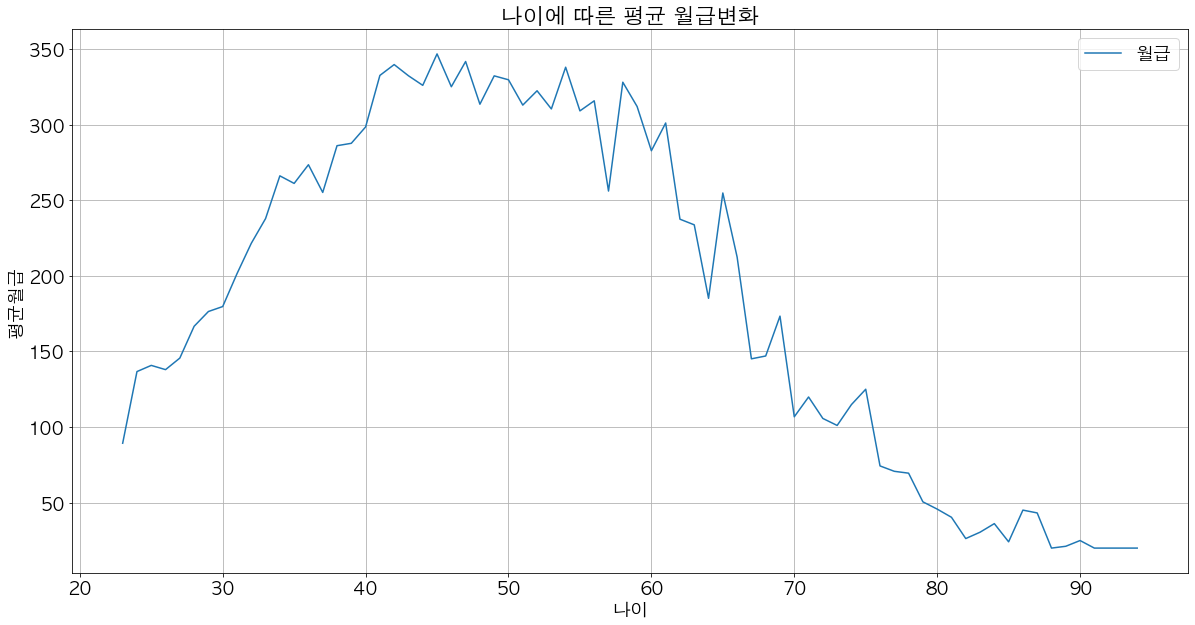

In [37]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

나이월급평균_df.plot()
pyplot.title('나이에 따른 평균 월급변화')
pyplot.grid()
pyplot.xlabel('나이')
pyplot.ylabel('평균월급')

pyplot.show()

## 04) 연령대 분포

### 1) 데이터 전처리

#### 태어난 년도 컬럼 추출

In [38]:
년도추출 = df.filter(['h12_g4'])
년도추출

,h12_g4
0,1936
1,1945
2,1948
3,1942
4,1923
...,...
15417,1967
15418,1992
15419,1995
15420,1998


In [39]:
년도_df = 년도추출.rename(columns={'h12_g4' : '태어난년도'})
년도_df

,태어난년도
0,1936
1,1945
2,1948
3,1942
4,1923
...,...
15417,1967
15418,1992
15419,1995
15420,1998


In [40]:
년도_df['나이'] = dt.datetime.now().year -년도_df['태어난년도']+1
년도_df

,태어난년도,나이
0,1936,85
1,1945,76
2,1948,73
3,1942,79
4,1923,98
...,...,...
15417,1967,54
15418,1992,29
15419,1995,26
15420,1998,23


In [41]:
년도_df['연령대'] =(년도_df['나이']// 10)* 10
년도_df

,태어난년도,나이,연령대
0,1936,85,80
1,1945,76,70
2,1948,73,70
3,1942,79,70
4,1923,98,90
...,...,...,...
15417,1967,54,50
15418,1992,29,20
15419,1995,26,20
15420,1998,23,20


In [42]:
년도_df.isna().sum()

태어난년도    0
나이       0
연령대      0
dtype: int64

In [43]:
연령대분포_df1 =년도_df.filter(['연령대','나이']).groupby('연령대').count()
연령대분포_df1

,나이
연령대,
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148


In [44]:
vcount = 년도_df['연령대'].value_counts()
연령대분포_df2 = DataFrame(vcount)
연령대분포_df2

,연령대
70,2190
80,2148
50,1994
60,1948
40,1946
20,1567
10,1442
30,1315
0,470
90,386


In [45]:
연령대분포_정렬_df = 연령대분포_df2.sort_index()
연령대분포_정렬_df

,연령대
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148
90,386


In [46]:
index_after = {}
for i in list(연령대분포_정렬_df.index):
    index_after[i] = "%d대" %i

연령대분포_정렬_df.rename(index=index_after, inplace=True)
연령대분포_정렬_df

,연령대
0대,470
10대,1442
20대,1567
30대,1315
40대,1946
50대,1994
60대,1948
70대,2190
80대,2148
90대,386


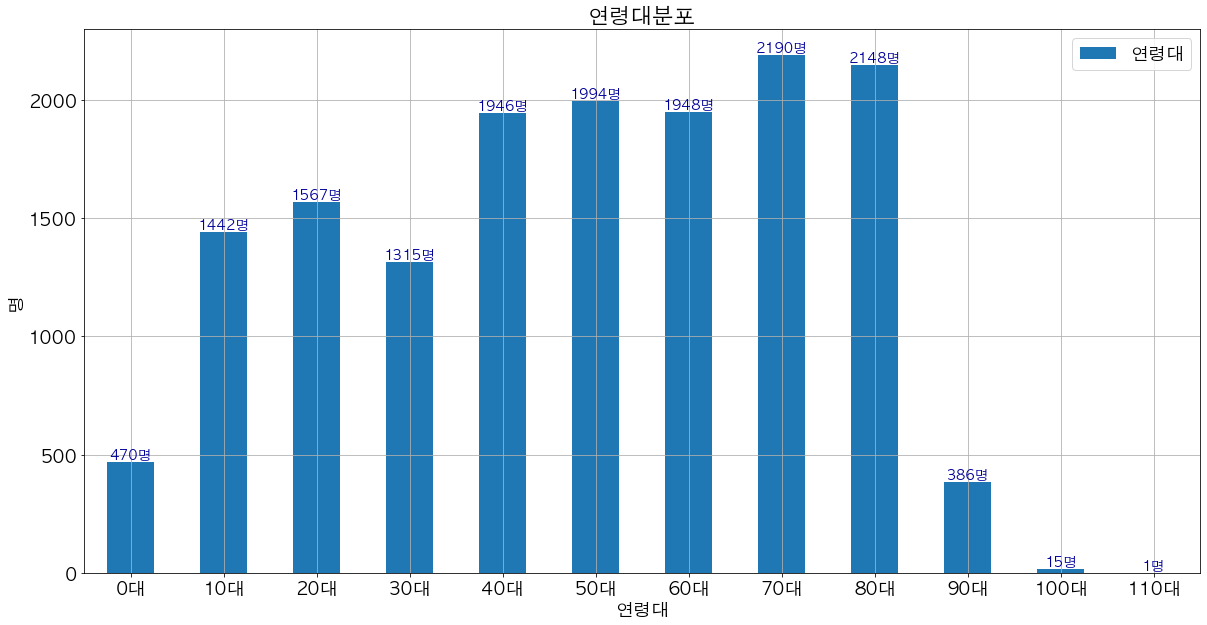

In [47]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

연령대분포_정렬_df.plot.bar(rot=0)
pyplot.title('연령대분포')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('명')

for i, v in enumerate(list(연령대분포_정렬_df['연령대'])):
    txt = "%d명" %v
    pyplot.text(i, v, txt, fontsize=14, color='#000099',
               horizontalalignment='center', verticalalignment='bottom')
    

pyplot.show()

In [48]:
년도월급 = df.filter(['h12_g4','p1202_8aq1'])
년도월급

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [49]:
년도월급_df= 년도월급.rename(columns={'h12_g4' : '태어난년도', 'p1202_8aq1' : '월급'})
년도월급_df

,태어난년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [50]:
년도월급_df['연령대'] =(dt.datetime.now().year - 년도월급_df['태어난년도'] + 1) // 10*10
년도월급_df

,태어난년도,월급,연령대
0,1936,NaN,80
1,1945,NaN,70
2,1948,NaN,70
3,1942,108.9,70
4,1923,NaN,90
...,...,...,...
15417,1967,NaN,50
15418,1992,NaN,20
15419,1995,72.0,20
15420,1998,NaN,20


In [51]:
년도월급_df.isna().sum()


태어난년도        0
월급       10915
연령대          0
dtype: int64

In [52]:
년도월급_df.dropna(inplace=True)
년도월급_df.isna().sum()

태어난년도    0
월급       0
연령대      0
dtype: int64

In [53]:
연령대별_평균급여_df = 년도월급_df.filter(['연령대','월급']).groupby('연령대').mean()
연령대별_평균급여_df

,월급
연령대,
20,154.890476
30,245.701425
40,328.371147
50,314.173167
60,226.846086
70,94.149102
80,35.000000
90,22.000000


In [54]:
index_after={}
for i in list(연령대별_평균급여_df.index):
    index_after[i] = "%d대" %i
연령대별_평균급여_df.rename(index=index_after, inplace=True)
연령대별_평균급여_df

,월급
연령대,
20대,154.890476
30대,245.701425
40대,328.371147
50대,314.173167
60대,226.846086
70대,94.149102
80대,35.000000
90대,22.000000


/Users/donut/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


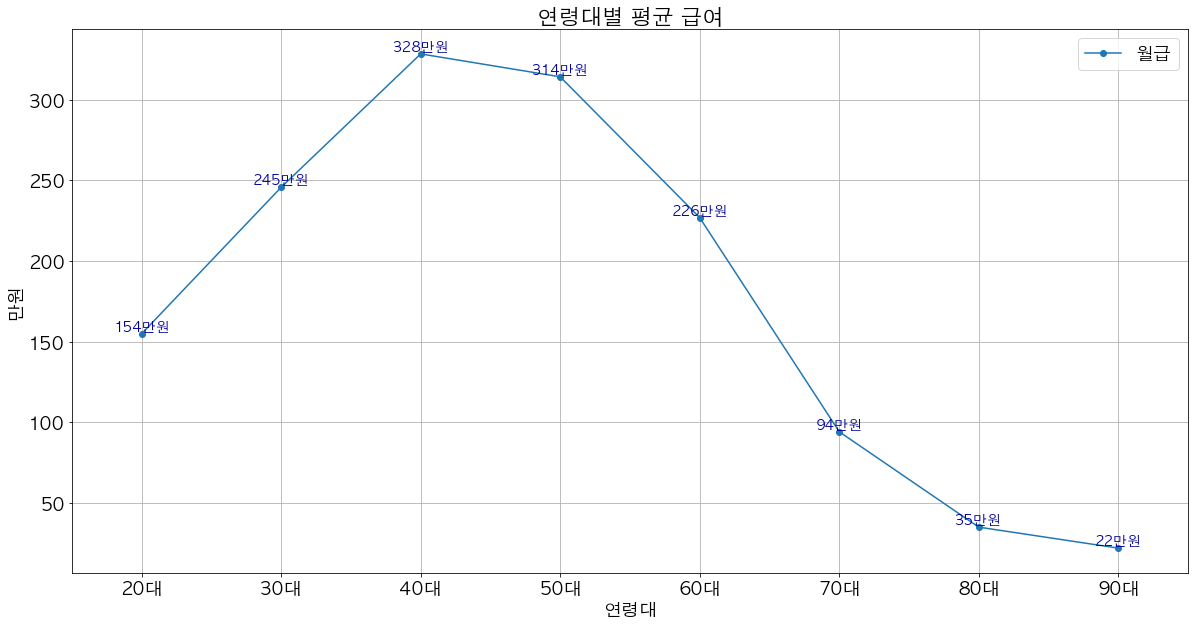

In [55]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

연령대별_평균급여_df.plot(marker="o")
pyplot.title('연령대별 평균 급여')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('만원')
pyplot.xlim(-0.5, 7.5)

for i, v in enumerate(list(연령대별_평균급여_df['월급'])):
    txt = "%d만원" %v
    pyplot.text(i, v, txt, fontsize=14, color = '#000099',
               horizontalalignment = 'center', verticalalignment='bottom')
pyplot.show()

In [56]:
성별년도 = df.filter(['h12_g3','h12_g4'])
성별년도


,h12_g3,h12_g4
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923
...,...,...
15417,2,1967
15418,2,1992
15419,1,1995
15420,2,1998


In [57]:
성별년도_df = 성별년도.rename(columns= { 'h12_g3' : '성별', 'h12_g4': '태어난년도'})
성별년도_df

,성별,태어난년도
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923
...,...,...
15417,2,1967
15418,2,1992
15419,1,1995
15420,2,1998


In [58]:
성별년도_df['성별'] = numpy.where(성별년도_df['성별']==1, '남자','여자')
성별년도_df

,성별,태어난년도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923
...,...,...
15417,여자,1967
15418,여자,1992
15419,남자,1995
15420,여자,1998


In [59]:
성별년도_df['연령대'] = (dt.datetime.now().year - 성별년도_df['태어난년도'] +1 )//10*10
성별년도_df

,성별,태어난년도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,70
4,여자,1923,90
...,...,...,...
15417,여자,1967,50
15418,여자,1992,20
15419,남자,1995,20
15420,여자,1998,20


In [60]:
성별년도_df.isna().sum()

성별       0
태어난년도    0
연령대      0
dtype: int64

In [61]:
연령대_성별_빈도_df = 성별년도_df.groupby(['성별', '연령대'], as_index=False).count()
연령대_성별_빈도_df

,성별,연령대,태어난년도
0,남자,0,239
1,남자,10,732
2,남자,20,710
3,남자,30,636
4,남자,40,981
5,남자,50,1004
6,남자,60,888
7,남자,70,834
8,남자,80,820
9,남자,90,132


In [62]:
연령대_성별_집계_df = 연령대_성별_빈도_df.rename(columns={'태어난년도':'명'})
연령대_성별_집계_df

,성별,연령대,명
0,남자,0,239
1,남자,10,732
2,남자,20,710
3,남자,30,636
4,남자,40,981
5,남자,50,1004
6,남자,60,888
7,남자,70,834
8,남자,80,820
9,남자,90,132


In [63]:
연령대_성별_pv = 연령대_성별_집계_df.pivot('연령대','성별','명')
연령대_성별_pv

성별,남자,여자
연령대,,
0,239.0,231.0
10,732.0,710.0
20,710.0,857.0
30,636.0,679.0
40,981.0,965.0
50,1004.0,990.0
60,888.0,1060.0
70,834.0,1356.0
80,820.0,1328.0


In [64]:
index_after = {}
for i in list(연령대_성별_pv.index):
    index_after[i] ="%d 명" %i

print(index_after)
연령대_성별_pv.rename(index=index_after, inplace=True)
연령대_성별_pv

{0: '0 명', 10: '10 명', 20: '20 명', 30: '30 명', 40: '40 명', 50: '50 명', 60: '60 명', 70: '70 명', 80: '80 명', 90: '90 명', 100: '100 명', 110: '110 명'}


성별,남자,여자
연령대,,
0 명,239.0,231.0
10 명,732.0,710.0
20 명,710.0,857.0
30 명,636.0,679.0
40 명,981.0,965.0
50 명,1004.0,990.0
60 명,888.0,1060.0
70 명,834.0,1356.0
80 명,820.0,1328.0


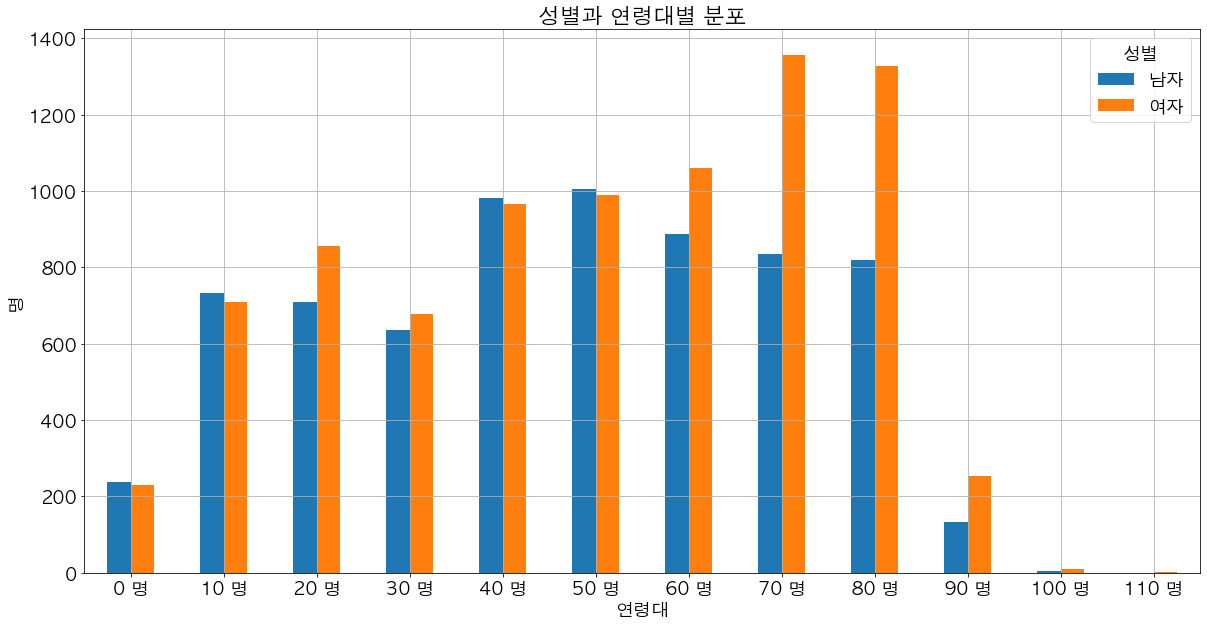

In [65]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

연령대_성별_pv.plot.bar(rot=0)
pyplot.title('성별과 연령대별 분포')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('명')
pyplot.show()

In [66]:
성별년도월급 = df.filter(['h12_g3','h12_g4','p1202_8aq1'])
성별년도월급

,h12_g3,h12_g4,p1202_8aq1
0,2,1936,NaN
1,2,1945,NaN
2,1,1948,NaN
3,1,1942,108.9
4,2,1923,NaN
...,...,...,...
15417,2,1967,NaN
15418,2,1992,NaN
15419,1,1995,72.0
15420,2,1998,NaN


In [67]:
성별년도월급_df = 성별년도월급.rename(columns= { 'h12_g3' : '성별', 'h12_g4': '태어난년도','p1202_8aq1' : '월급'})
성별년도월급_df

,성별,태어난년도,월급
0,2,1936,NaN
1,2,1945,NaN
2,1,1948,NaN
3,1,1942,108.9
4,2,1923,NaN
...,...,...,...
15417,2,1967,NaN
15418,2,1992,NaN
15419,1,1995,72.0
15420,2,1998,NaN


In [68]:
성별년도월급_df['성별'] = numpy.where(성별년도월급_df['성별']==1, '남자','여자')
성별년도월급_df

,성별,태어난년도,월급
0,여자,1936,NaN
1,여자,1945,NaN
2,남자,1948,NaN
3,남자,1942,108.9
4,여자,1923,NaN
...,...,...,...
15417,여자,1967,NaN
15418,여자,1992,NaN
15419,남자,1995,72.0
15420,여자,1998,NaN


In [69]:
성별년도월급_df['연령대'] =(dt.datetime.now().year - 년도월급_df['태어난년도'] + 1) // 10 * 10
성별년도월급_df

,성별,태어난년도,월급,연령대
0,여자,1936,NaN,NaN
1,여자,1945,NaN,NaN
2,남자,1948,NaN,NaN
3,남자,1942,108.9,70.0
4,여자,1923,NaN,NaN
...,...,...,...,...
15417,여자,1967,NaN,NaN
15418,여자,1992,NaN,NaN
15419,남자,1995,72.0,20.0
15420,여자,1998,NaN,NaN


In [70]:
성별년도월급_df.isna().sum()

성별           0
태어난년도        0
월급       10915
연령대      10915
dtype: int64

In [71]:
성별년도월급_df.dropna(inplace=True)
성별년도월급_df.isna().sum()

성별       0
태어난년도    0
월급       0
연령대      0
dtype: int64

In [72]:
성별년도월급_df

,성별,태어난년도,월급,연령대
3,남자,1942,108.9,70.0
10,여자,1940,20.0,80.0
16,남자,1978,322.0,40.0
17,여자,1975,120.0,40.0
24,남자,1975,300.0,40.0
...,...,...,...,...
15400,남자,1966,230.0,50.0
15401,여자,1962,138.0,50.0
15404,여자,1993,286.0,20.0
15412,남자,1956,179.0,60.0


In [73]:
성별연령대별_평균급여_df = 성별년도월급_df.filter(['연령대','성별','월급']).groupby(['연령대','성별'], as_index=False).mean()
성별연령대별_평균급여_df

,연령대,성별,월급
0,20.0,남자,156.181818
1,20.0,여자,154.322286
2,30.0,남자,274.759589
3,30.0,여자,214.197772
4,40.0,남자,400.574993
5,40.0,여자,220.524301
6,50.0,남자,412.705997
7,50.0,여자,197.562742
8,60.0,남자,305.555241
9,60.0,여자,141.091975


In [74]:
성별연령대별_평균급여_pv = 성별연령대별_평균급여_df.pivot('연령대','성별','월급')
성별연령대별_평균급여_pv

성별,남자,여자
연령대,,
20.0,156.181818,154.322286
30.0,274.759589,214.197772
40.0,400.574993,220.524301
50.0,412.705997,197.562742
60.0,305.555241,141.091975
70.0,131.130986,66.797917
80.0,42.545455,29.939024
90.0,20.000000,22.500000


In [75]:
index_after = {}
for i in list(성별연령대별_평균급여_pv.index):
    index_after[i] ="%d대" %i
성별연령대별_평균급여_pv.rename(index=index_after, inplace=True)
성별연령대별_평균급여_pv

성별,남자,여자
연령대,,
20대,156.181818,154.322286
30대,274.759589,214.197772
40대,400.574993,220.524301
50대,412.705997,197.562742
60대,305.555241,141.091975
70대,131.130986,66.797917
80대,42.545455,29.939024
90대,20.000000,22.500000


/Users/donut/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


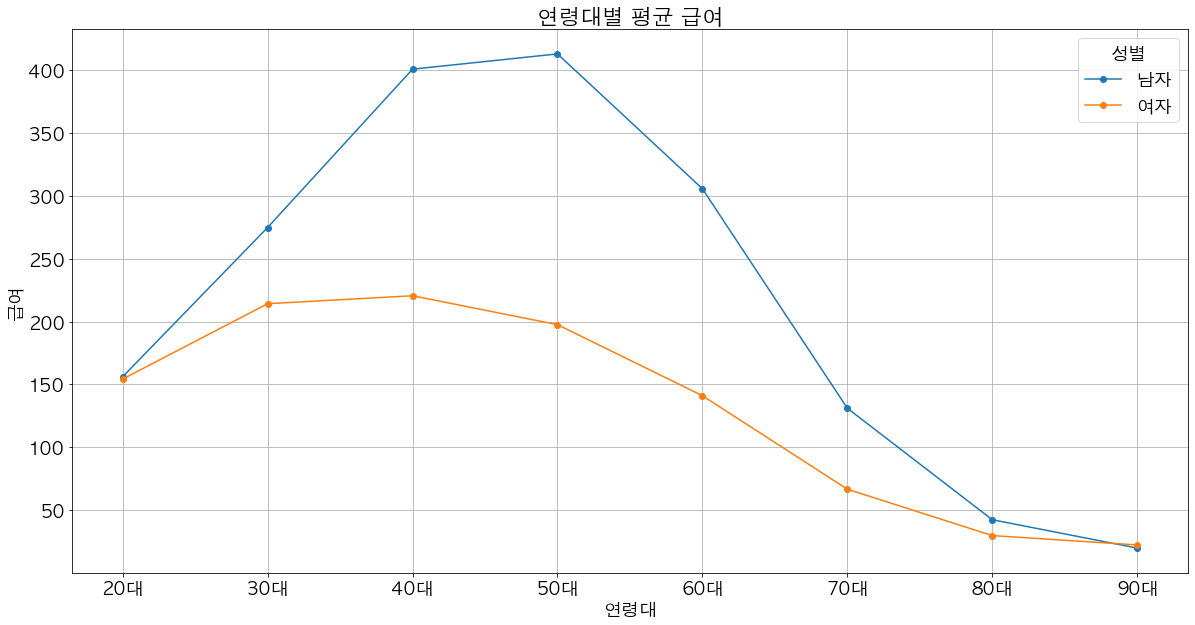

In [76]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

성별연령대별_평균급여_pv.plot(marker="o")
pyplot.title('연령대별 평균 급여')
pyplot.grid()
pyplot.xlabel('연령대')
pyplot.ylabel('급여')



pyplot.show()

In [77]:
지역년도 = df.filter(['h12_g4', 'h12_reg7'])
지역년도df = 지역년도.rename(columns = {'h12_g4' : '태어난년도', 'h12_reg7':'지역코드'})
지역년도df['나이'] =dt.datetime.now().year - 지역년도df['태어난년도']+1
지역년도df.drop('태어난년도', axis =1, inplace =True)
지역년도df

,지역코드,나이
0,1,85
1,1,76
2,1,73
3,1,79
4,1,98
...,...,...
15417,5,54
15418,5,29
15419,5,26
15420,5,23


In [78]:
지역코드표df = DataFrame({'지역코드' : list(range(1,8)),
                    '지역':["서울","인천,경기","부산,경남,울산","대구,경북","대전,충남","강원,충북","광주,전남,전북,제주",]})
지역코드표df

,지역코드,지역
0,1,서울
1,2,"인천,경기"
2,3,"부산,경남,울산"
3,4,"대구,경북"
4,5,"대전,충남"
5,6,"강원,충북"
6,7,"광주,전남,전북,제주"


In [79]:
지역나이df = pd.merge(지역년도df, 지역코드표df, how='outer')
지역나이df

,지역코드,나이,지역
0,1,85,서울
1,1,76,서울
2,1,73,서울
3,1,79,서울
4,1,98,서울
...,...,...,...
15417,3,18,"부산,경남,울산"
15418,3,15,"부산,경남,울산"
15419,3,37,"부산,경남,울산"
15420,3,37,"부산,경남,울산"


In [80]:
지역나이df.isna().sum()

지역코드    0
나이      0
지역      0
dtype: int64

In [81]:
conditions = [ (지역나이df['나이'] < 30),
             (지역나이df['나이'] < 60),
             (지역나이df['나이'] > 60)]

level = ['청년층','중년층','노년층']

지역나이df['연령층'] = numpy.select(conditions, level)
지역나이df

,지역코드,나이,지역,연령층
0,1,85,서울,노년층
1,1,76,서울,노년층
2,1,73,서울,노년층
3,1,79,서울,노년층
4,1,98,서울,노년층
...,...,...,...,...
15417,3,18,"부산,경남,울산",청년층
15418,3,15,"부산,경남,울산",청년층
15419,3,37,"부산,경남,울산",중년층
15420,3,37,"부산,경남,울산",중년층


In [82]:
지역별연령층df = 지역나이df.filter(['지역','연령층','나이']).groupby(['지역','연령층'], as_index=False).count()
지역별연령층df

,지역,연령층,나이
0,"강원,충북",0,13
1,"강원,충북",노년층,554
2,"강원,충북",중년층,361
3,"강원,충북",청년층,252
4,"광주,전남,전북,제주",0,25
5,"광주,전남,전북,제주",노년층,1258
6,"광주,전남,전북,제주",중년층,867
7,"광주,전남,전북,제주",청년층,599
8,"대구,경북",0,26
9,"대구,경북",노년층,947


In [83]:
지역별연령층df.rename(columns={'나이' : '조사인원'}, inplace=True)
지역별연령층df

,지역,연령층,조사인원
0,"강원,충북",0,13
1,"강원,충북",노년층,554
2,"강원,충북",중년층,361
3,"강원,충북",청년층,252
4,"광주,전남,전북,제주",0,25
5,"광주,전남,전북,제주",노년층,1258
6,"광주,전남,전북,제주",중년층,867
7,"광주,전남,전북,제주",청년층,599
8,"대구,경북",0,26
9,"대구,경북",노년층,947


In [84]:
지역별연령층pv = 지역별연령층df.pivot('지역','연령층','조사인원')
지역별연령층pv

연령층,0,노년층,중년층,청년층
지역,,,,
"강원,충북",13,554,361,252
"광주,전남,전북,제주",25,1258,867,599
"대구,경북",26,947,537,364
"대전,충남",18,573,443,321
"부산,경남,울산",34,1155,844,531
서울,34,824,868,482
"인천,경기",47,1180,1335,930


In [85]:
지역별연령층pv = 지역별연령층pv.reindex(columns=['청년층','중년층','노년층'])
지역별연령층pv

연령층,청년층,중년층,노년층
지역,,,
"강원,충북",252,361,554
"광주,전남,전북,제주",599,867,1258
"대구,경북",364,537,947
"대전,충남",321,443,573
"부산,경남,울산",531,844,1155
서울,482,868,824
"인천,경기",930,1335,1180


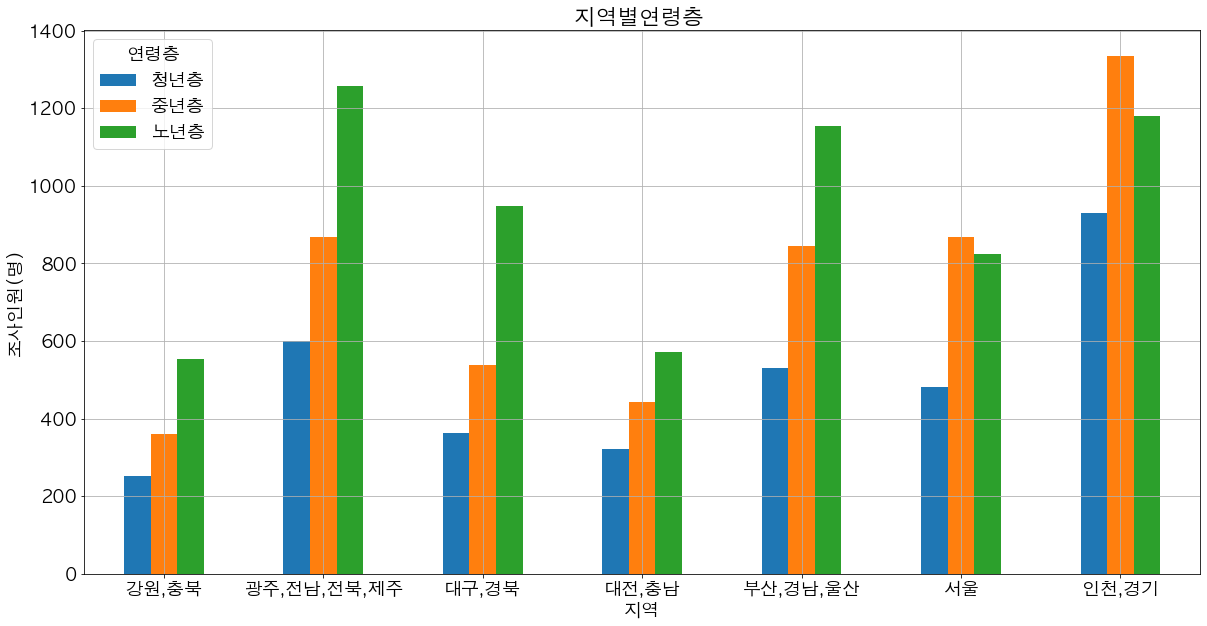

In [86]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

지역별연령층pv.plot.bar(rot=0)
pyplot.title('지역별연령층 ')
pyplot.grid()
pyplot.xlabel('지역')
pyplot.ylabel('조사인원(명)')
pyplot.show()

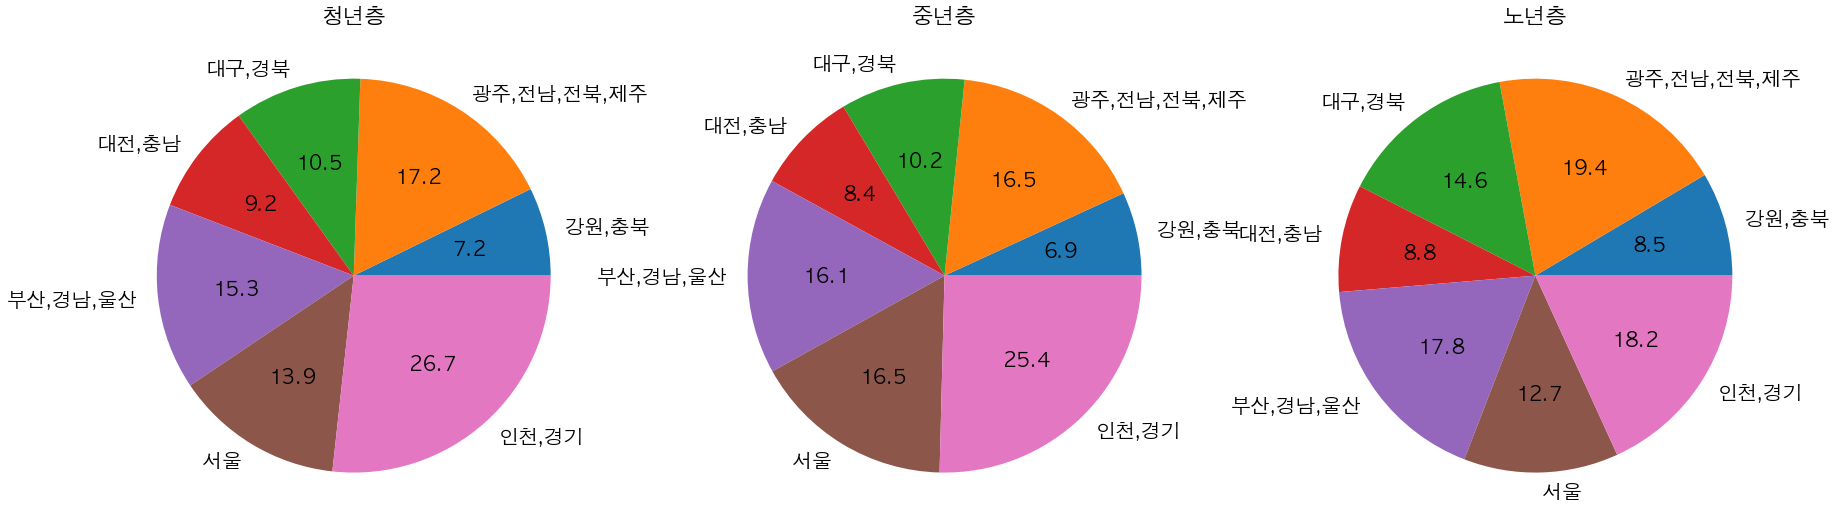

In [92]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (30,20)


fig = pyplot.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

지역별연령층pv['청년층'].plot.pie(ax=ax1, autopct = "%0.1f", textprops = {'color' : "#000000", 'fontsize': 20})
ax1.title.set_text("청년층")
ax1.set(ylabel=None)

지역별연령층pv['중년층'].plot.pie(ax=ax2, autopct = "%0.1f", textprops = {'color' : "#000000", 'fontsize': 20})
ax2.title.set_text("중년층")
ax2.set(ylabel=None)

지역별연령층pv['노년층'].plot.pie(ax=ax3, autopct = "%0.1f", textprops = {'color' : "#000000", 'fontsize': 20})
ax3.title.set_text("노년층")
ax3.set(ylabel=None)

pyplot.savefig("data.png")
pyplot.show()

In [89]:
pyplot.save("data.png") 

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [91]:
pyplot.savefig("data.png")

<Figure size 2160x1440 with 0 Axes>